In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main
import pysindy as psd

## Flow

In [2]:
flow_all_close, speed_all_close, occupancy_all_close, flow_dt_close, speed_dt_close, occupancy_dt_close = data_loader_main(csv_dict='Sim_Results/Ramp_Close')
flow_all_open, speed_all_open, occupancy_all_open, flow_dt_open, speed_dt_open, occupancy_dt_open = data_loader_main(csv_dict='Sim_Results/Ramp_Open')
flow_all_random, speed_all_random, occupancy_all_random, flow_dt_random, speed_dt_random, occupancy_dt_random = data_loader_main(csv_dict='Sim_Results/Ramp_Random')

In [3]:
control_input = pd.read_csv('Results/Meter_Rate.csv')

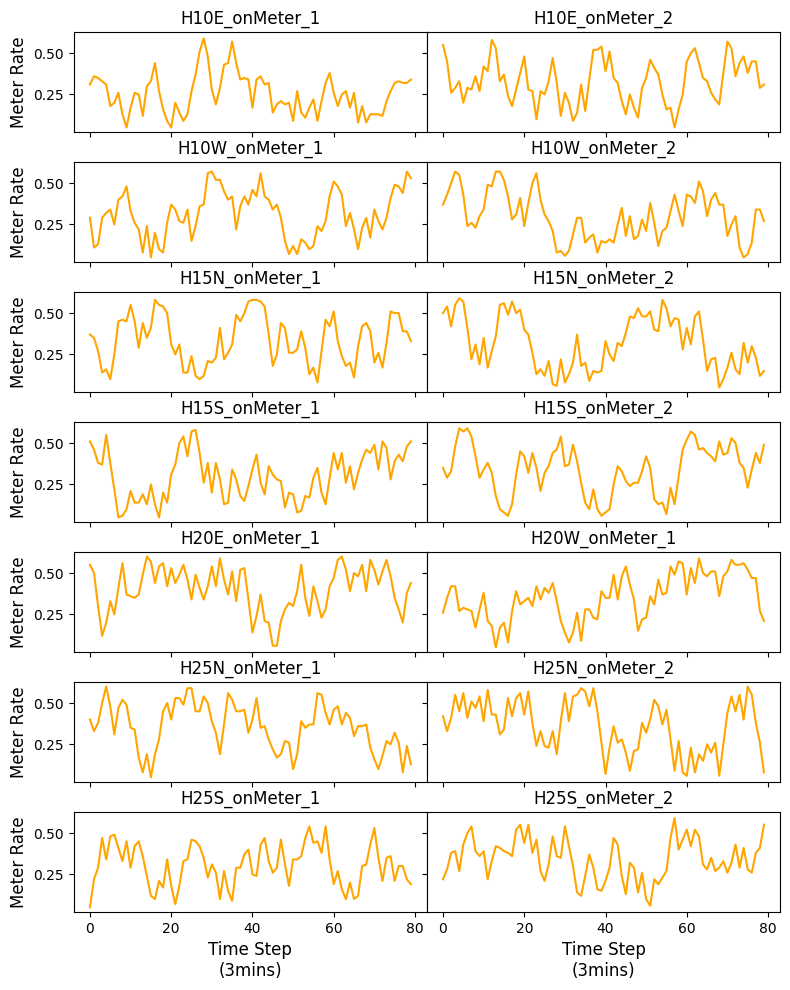

In [4]:
plt.show()
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(8, 10), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(7):
    for col in range(2):
        index = row * 2 + col
        axs[row, col].plot(control_input.iloc[:, index], "-", label='Meter Rate', c='orange')
        axs[row, col].set_title(control_input.columns[index], fontsize=12)

for col in range(2):
    axs[6, col].set_xlabel('Time Step\n(3mins)', fontsize=12)

for row in range(7):
    axs[row, 0].set_ylabel('Meter Rate', fontsize=12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()

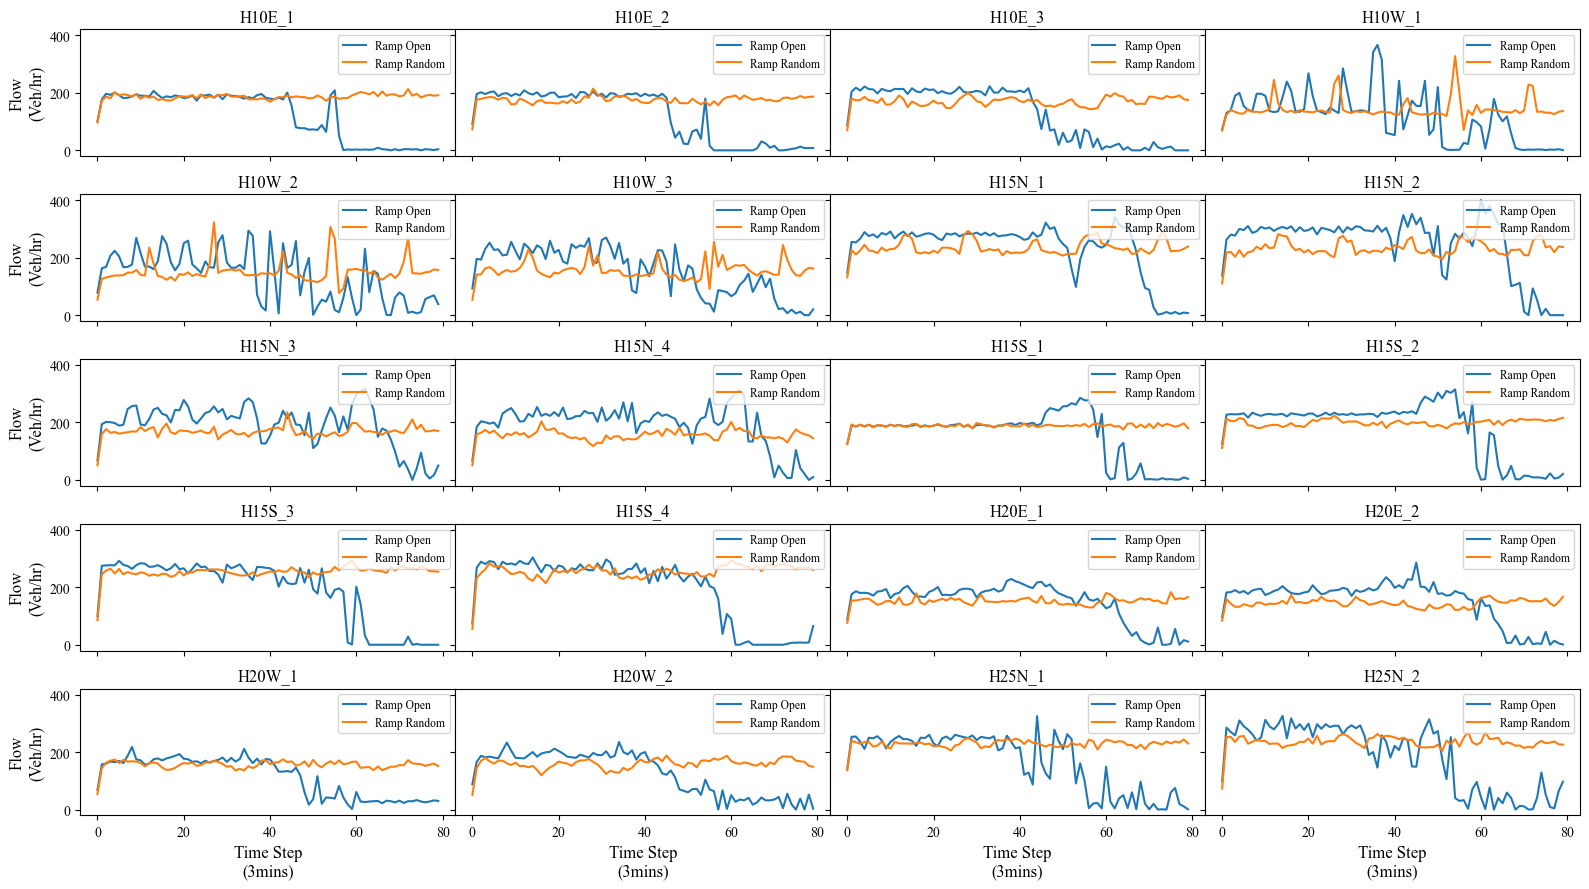

In [5]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(16, 9), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(5):
    for col in range(4):
        index = row*4 + col
        #axs[row, col].plot(flow_all_close.iloc[:, index], "-", label = 'Ramp Close')
        axs[row, col].plot(flow_all_open.iloc[:, index], "-", label = 'Ramp Open')
        axs[row, col].plot(flow_all_random.iloc[:, index], "-", label = 'Ramp Random')
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(flow_all_close.columns[index], fontsize=12)

for col in range(4):
    axs[4,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(5):
    axs[row,0].set_ylabel('Flow\n(Veh/hr)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Flow_Plot.png', dpi=300)

## Occupancy